In [138]:
# %run featuregeneration.ipynb

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [155]:
from sklearn.model_selection import train_test_split

# First split: 60% training, 40% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: 50% of temporary set for validation, 50% for test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have:
# X_train, y_train: 60% of the data
# X_val, y_val: 20% of the data
# X_test, y_test: 20% of the data

In [157]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_temp.shape)

(35064, 76)
(21038, 76)
(7013, 76)
(7013, 76)
(14026, 76)


# Bagging 

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Define the range of parameters to test
n_estimators_options = [50, 100, 150]  # It is the number of base estimators to be created.
max_features_options = [0.5, 0.7, 1] # Controls the number of features to draw from the whole dataset.
max_samples_options = [0.5, 0.7, 1.0] # Controls the number of samples to draw from the whole dataset.

# Variables to store the best combination and the lowest error
best_n_estimators = None
best_max_features = None
best_max_samples = None
best_mse = float("inf")

# Loop over all combinations of parameters
for n_estimators in n_estimators_options:
    for max_features in max_features_options:
        for max_samples in max_samples_options:
            # Initialize the model with the current combination of parameters
            bagging_model = BaggingRegressor(
                estimator=DecisionTreeRegressor(),
                n_estimators=n_estimators,
                max_features=max_features,
                max_samples=max_samples,
                random_state=101
            )
            
            # Fit the model
            bagging_model.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = bagging_model.predict(X_test)
            
            # Calculate the mean squared error
            mse = mean_squared_error(y_test, y_pred)
            
            # Update the best parameters if current mse is lower
            if mse < best_mse:
                best_mse = mse
                best_n_estimators = n_estimators
                best_max_features = max_features
                best_max_samples = max_samples

# Output the best combination and the corresponding MSE
print(f"Best Parameters:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_features: {best_max_features}")
print(f"max_samples: {best_max_samples}")
print(f"Mean Squared Error: {best_mse:.4f}")
# Best Parameters:
# n_estimators: 300
# max_features: 1
# max_samples: 1.0

# Refit the model with the best parameters
best_bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=best_n_estimators,
    max_features=best_max_features,
    max_samples=best_max_samples,
    random_state=101
)
best_bagging_model.fit(X_train, y_train)
y_pred = best_bagging_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")


The 'time' column is not found in the DataFrame.
Best Parameters:
n_estimators: 50
max_features: 1
max_samples: 1.0
Mean Squared Error: 183.6286
Mean Absolute Error (MAE): 10.595635207230591
Mean Squared Error (MSE): 183.62861196526188
R² Score: 0.1101


# Bagging w/ DecisionTreeRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Parameters for the Bagging Regressor
n_estimators = 100  # Number of base estimators
max_features = 0.7  # Fraction of features to use
max_samples = 0.7   # Fraction of samples to use

# Initialize the Bagging Regressor with the specified parameters
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=n_estimators,
    max_features=max_features,
    max_samples=max_samples,
    random_state=101
)

# Fit the model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")


# Ada Boost


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the AdaBoost Regressor with a Decision Tree as the base estimator
ada_boost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),  # Use shallow trees as weak learners
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate controls contribution of each estimator
    random_state=101
)

# Train the AdaBoost model
ada_boost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 7.999559362267943
Mean Squared Error (MSE): 100.70651133354073
R² Score: 0.5041


# XGBoost "Vanilla"

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor with default parameters
xgboost_model = XGBRegressor(
    n_estimators=100,       # Number of boosting rounds
    learning_rate=0.1,      # Step size shrinkage to prevent overfitting
    max_depth=3,            # Maximum tree depth for base learners
    random_state=42         # For reproducibility
)

# Fit the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale X

# Split the scaled data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

# Set up the parameter grid with sensible values
param_grid = {"max_depth":    [5, 6, 8],
              "n_estimators": [1000, 1500],
              "learning_rate": [0.08, 0.1, 1.2]}

# Initialize the regressor
regressor = xgb.XGBRegressor(eval_metric='rmse', random_state=42)

# Perform GridSearchCV on the training set
search = GridSearchCV(
    regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error'
)
search.fit(X_train, y_train)

print("The best hyperparameters are ", search.best_params_) # The best hyperparameters are  {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 1500}

The best hyperparameters are  {'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 1500}


Early Stopping: Training stopped after 1191 rounds out of 1500.

--- Evaluation Metrics ---
Mean Absolute Error (MAE): 3.1687
Mean Squared Error (MSE): 19.119
Root Mean Squared Error (RMSE): 4.3725
R-squared (R²): 0.9058

--- Overfitting Check ---
Difference between Training and Validation RMSE is significant. 3.0842490997931717 > 0.43426950322597657
Final Training RMSE: 1.2584
Final Validation RMSE: 4.3427
RMSE Difference: 3.0842


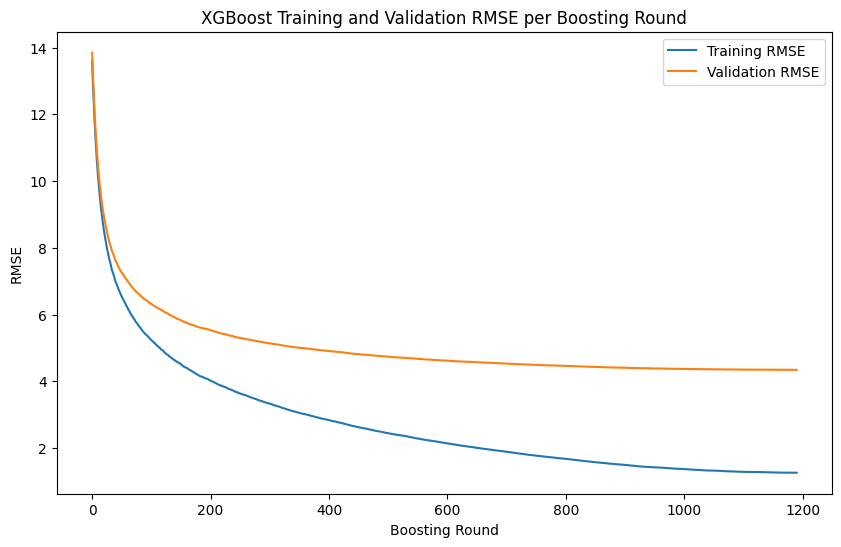

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the regressor with the best hyperparameters
params = {
    "learning_rate": search.best_params_["learning_rate"],
    "n_estimators": search.best_params_["n_estimators"],
    "max_depth": search.best_params_["max_depth"],
    'min_child_weight':1,        # Minimum sum of instance weight (default: 1)
    'gamma':0,                   # Minimum loss reduction required (default: 0)
    'subsample':1,               # Subsample ratio of the training instances (default: 1)
    'colsample_bytree':1,        # Subsample ratio of columns when constructing each tree (default: 1)
    'eval_metric':'rmse',        # Evaluation metric (default: 'rmse')
    'random_state':101,          # For reproducibility (user-specified)
    'early_stopping_rounds':10 # Stop training early if validation metric doesn’t improve (default: None)
}

best_regressor = xgb.XGBRegressor(**params)

# Train the model with early stopping
best_regressor.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False
)

# Check if early stopping was triggered
training_rounds = len(best_regressor.evals_result()['validation_0']['rmse'])
if training_rounds < params['n_estimators']:
    print(f"Early Stopping: Training stopped after {training_rounds} rounds out of {params['n_estimators']}.")

# Make predictions on the test set
predictions = best_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions).round(4)
rmse = np.sqrt(mse).round(4)
mae = mean_absolute_error(y_test, predictions).round(4)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print("\n--- Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2:.4f}")

# Retrieve training and validation RMSE results
results = best_regressor.evals_result()
train_rmse_final = results['validation_0']['rmse'][-1]
val_rmse_final = results['validation_1']['rmse'][-1]
rmse_diff = abs(train_rmse_final - val_rmse_final)

# Check for overfitting
print("\n--- Overfitting Check ---")
if rmse_diff > 0.1 * val_rmse_final:
    print(f"Warning: Potential overfitting detected.\nDifference between Training and Validation RMSE is significant. {rmse_diff} > {0.1 * val_rmse_final}")
else:
    print("Good generalization: Training and Validation RMSE values are close.")

print(f"Final Training RMSE: {train_rmse_final:.4f}")
print(f"Final Validation RMSE: {val_rmse_final:.4f}")
print(f"RMSE Difference: {rmse_diff:.4f}")

# Plot training and validation RMSE
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Training RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation RMSE per Boosting Round')
plt.show()


<Figure size 1000x800 with 0 Axes>

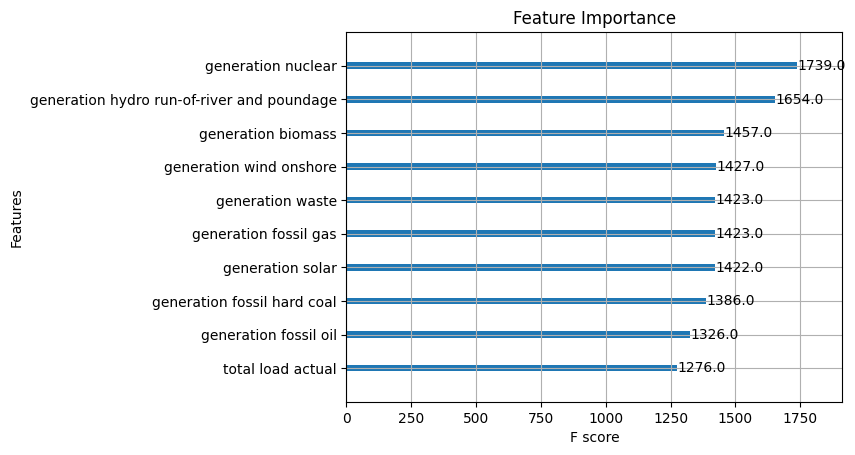

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_regressor, max_num_features=10)  # Limit to the top 10 most important features
plt.title('Feature Importance')
plt.show()

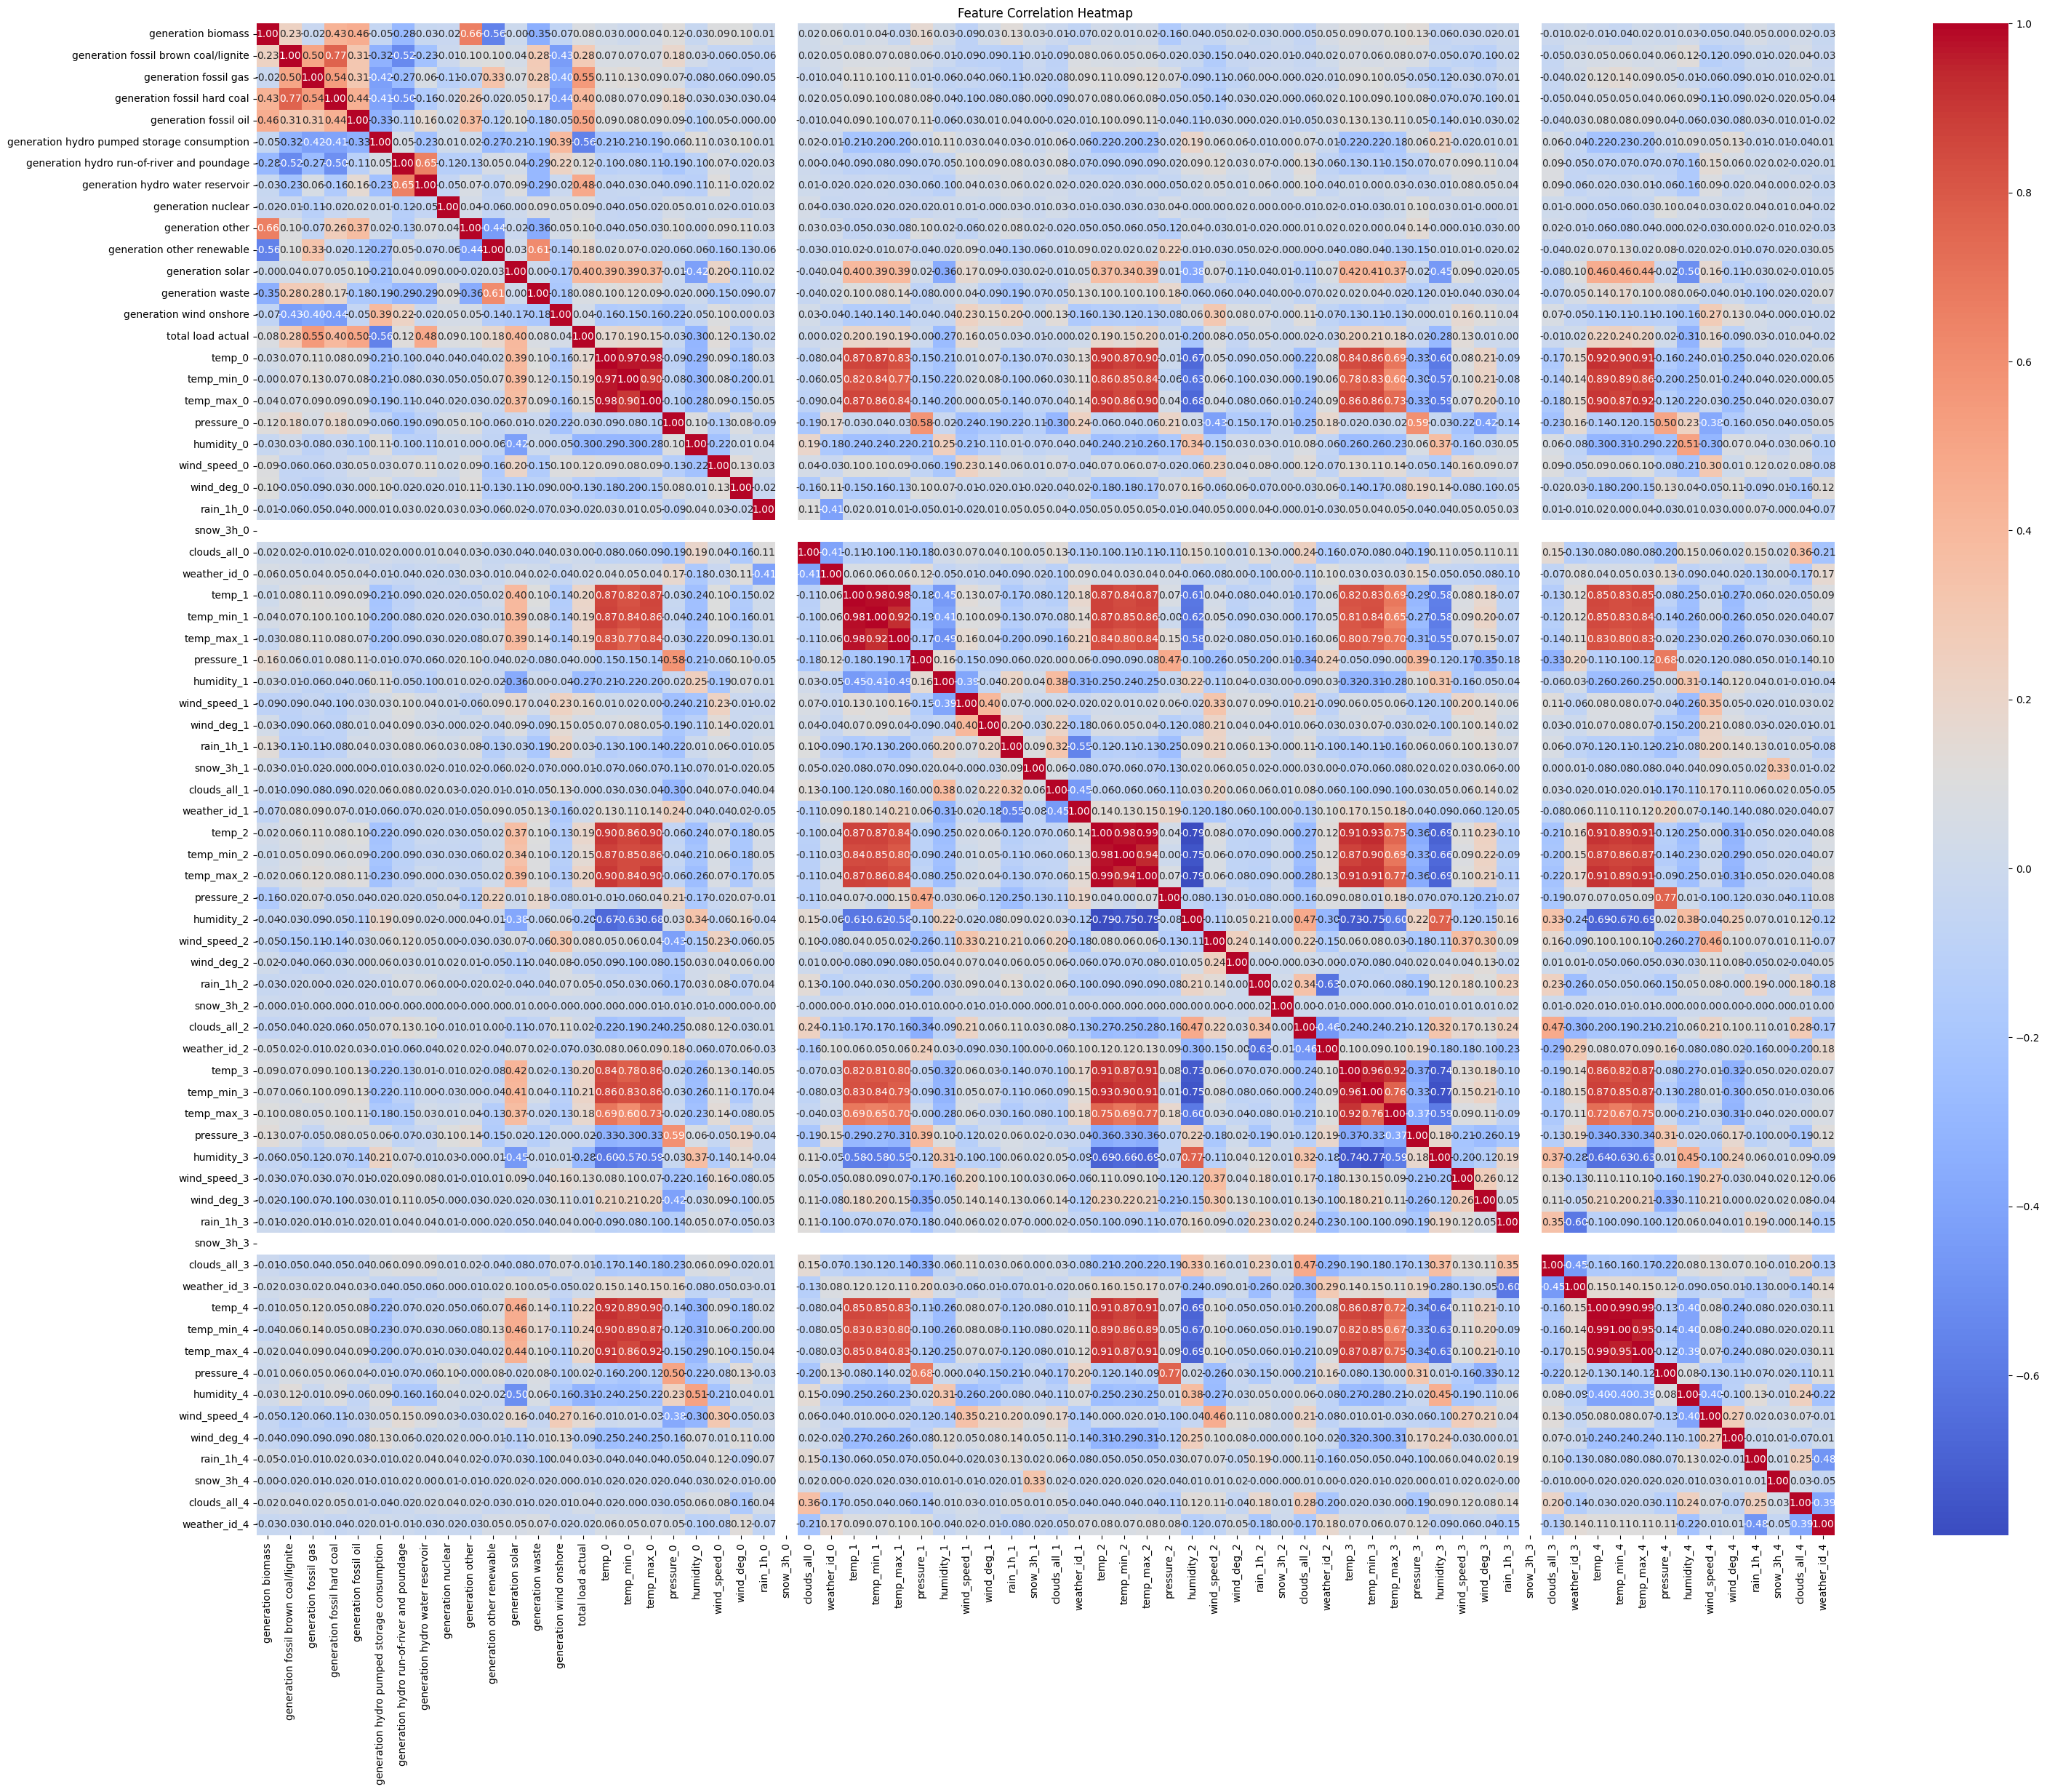

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 27))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

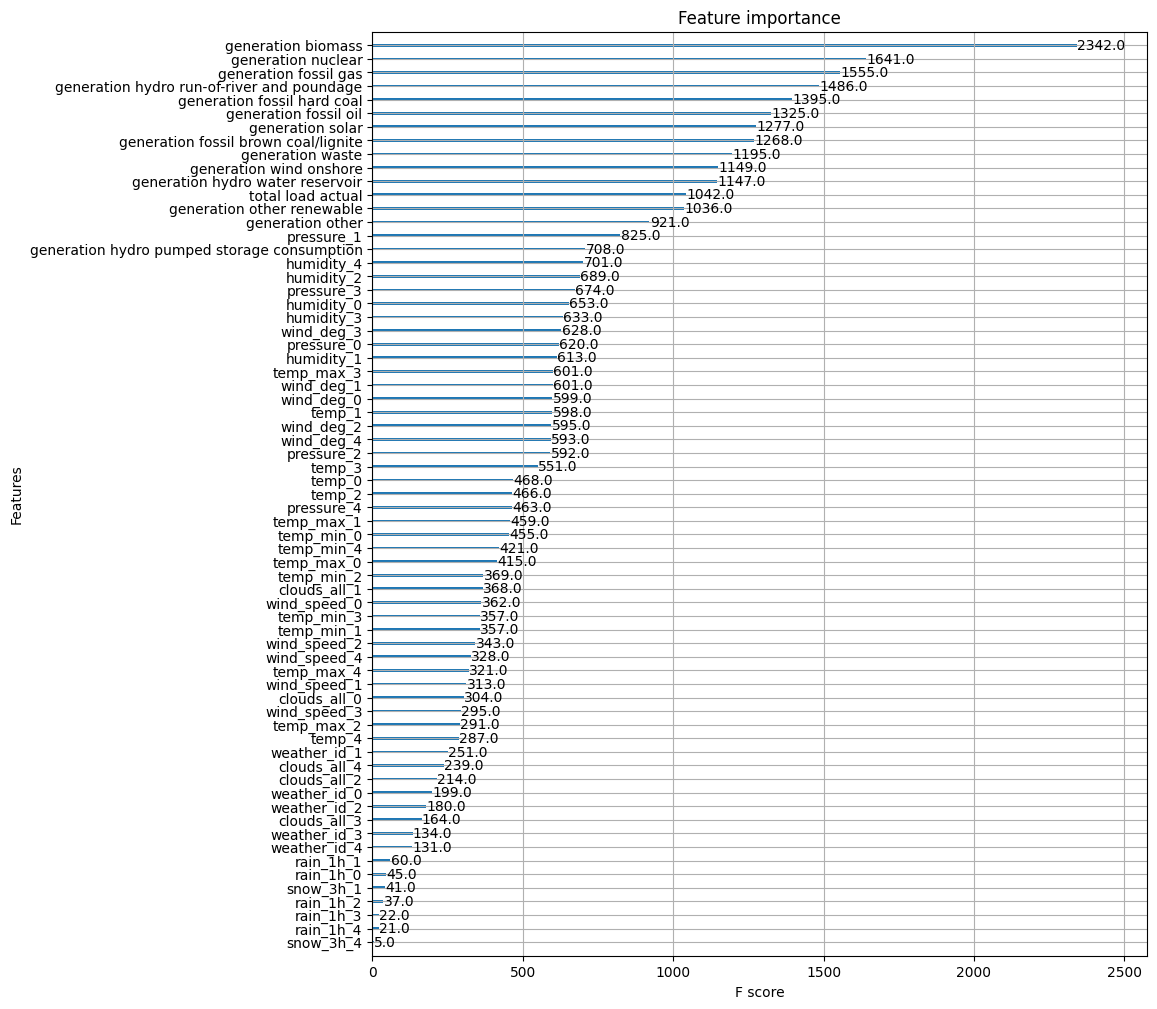

In [ ]:
# Plot feature importance using the trained model from cell 16
fig, ax = plt.subplots(figsize=(10, 12))  # Adjust the width and height as needed
xgb.plot_importance(bst, ax=ax)
plt.show()